# EXPLORATORY ANALYSIS

In [ ]:
pip install pandas seaborn matplotlib

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/NBA capstone/2024-03-06 Listing Data.csv')

Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


count    459159.000000
mean        257.129651
std         336.291205
min           0.000000
25%         106.000000
50%         169.000000
75%         290.000000
max       20000.000000
Name: TICKET_LISTING_PRICE, dtype: float64


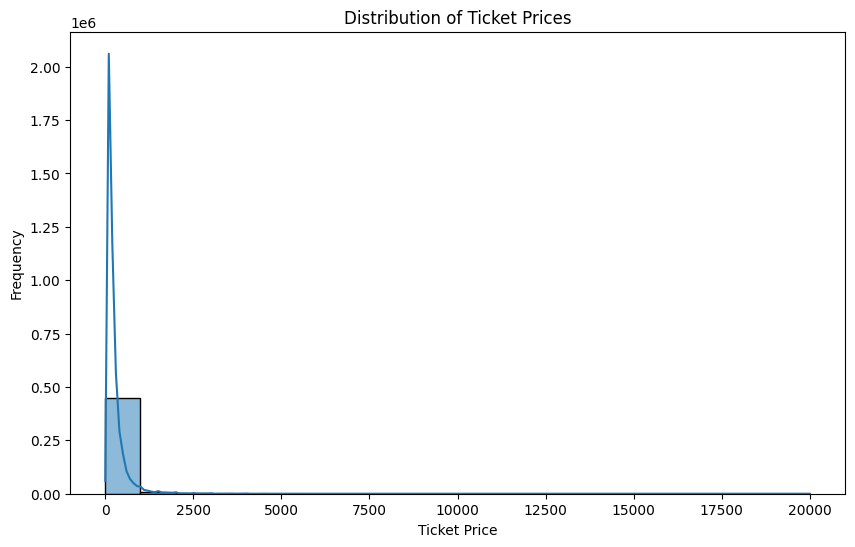

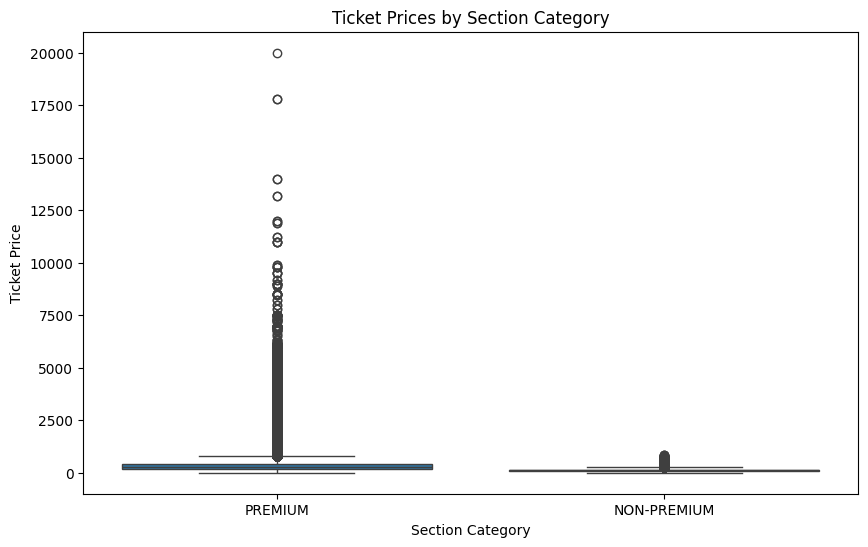

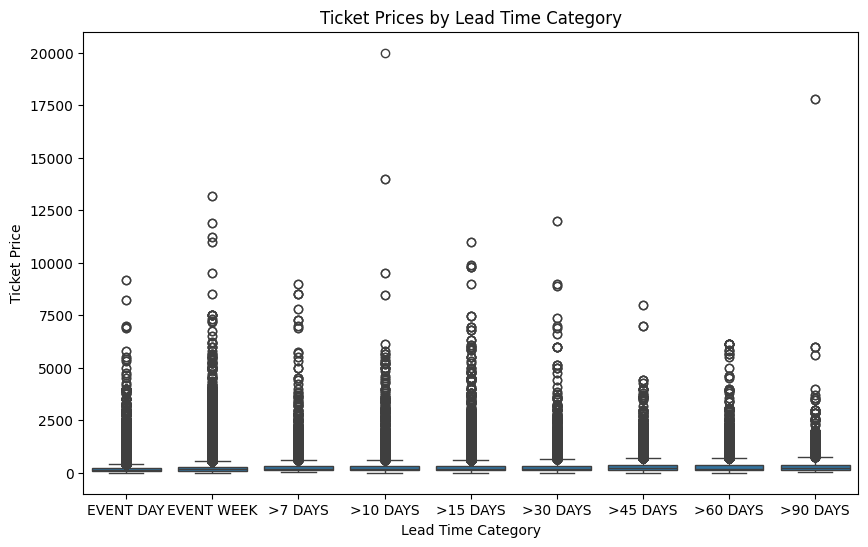

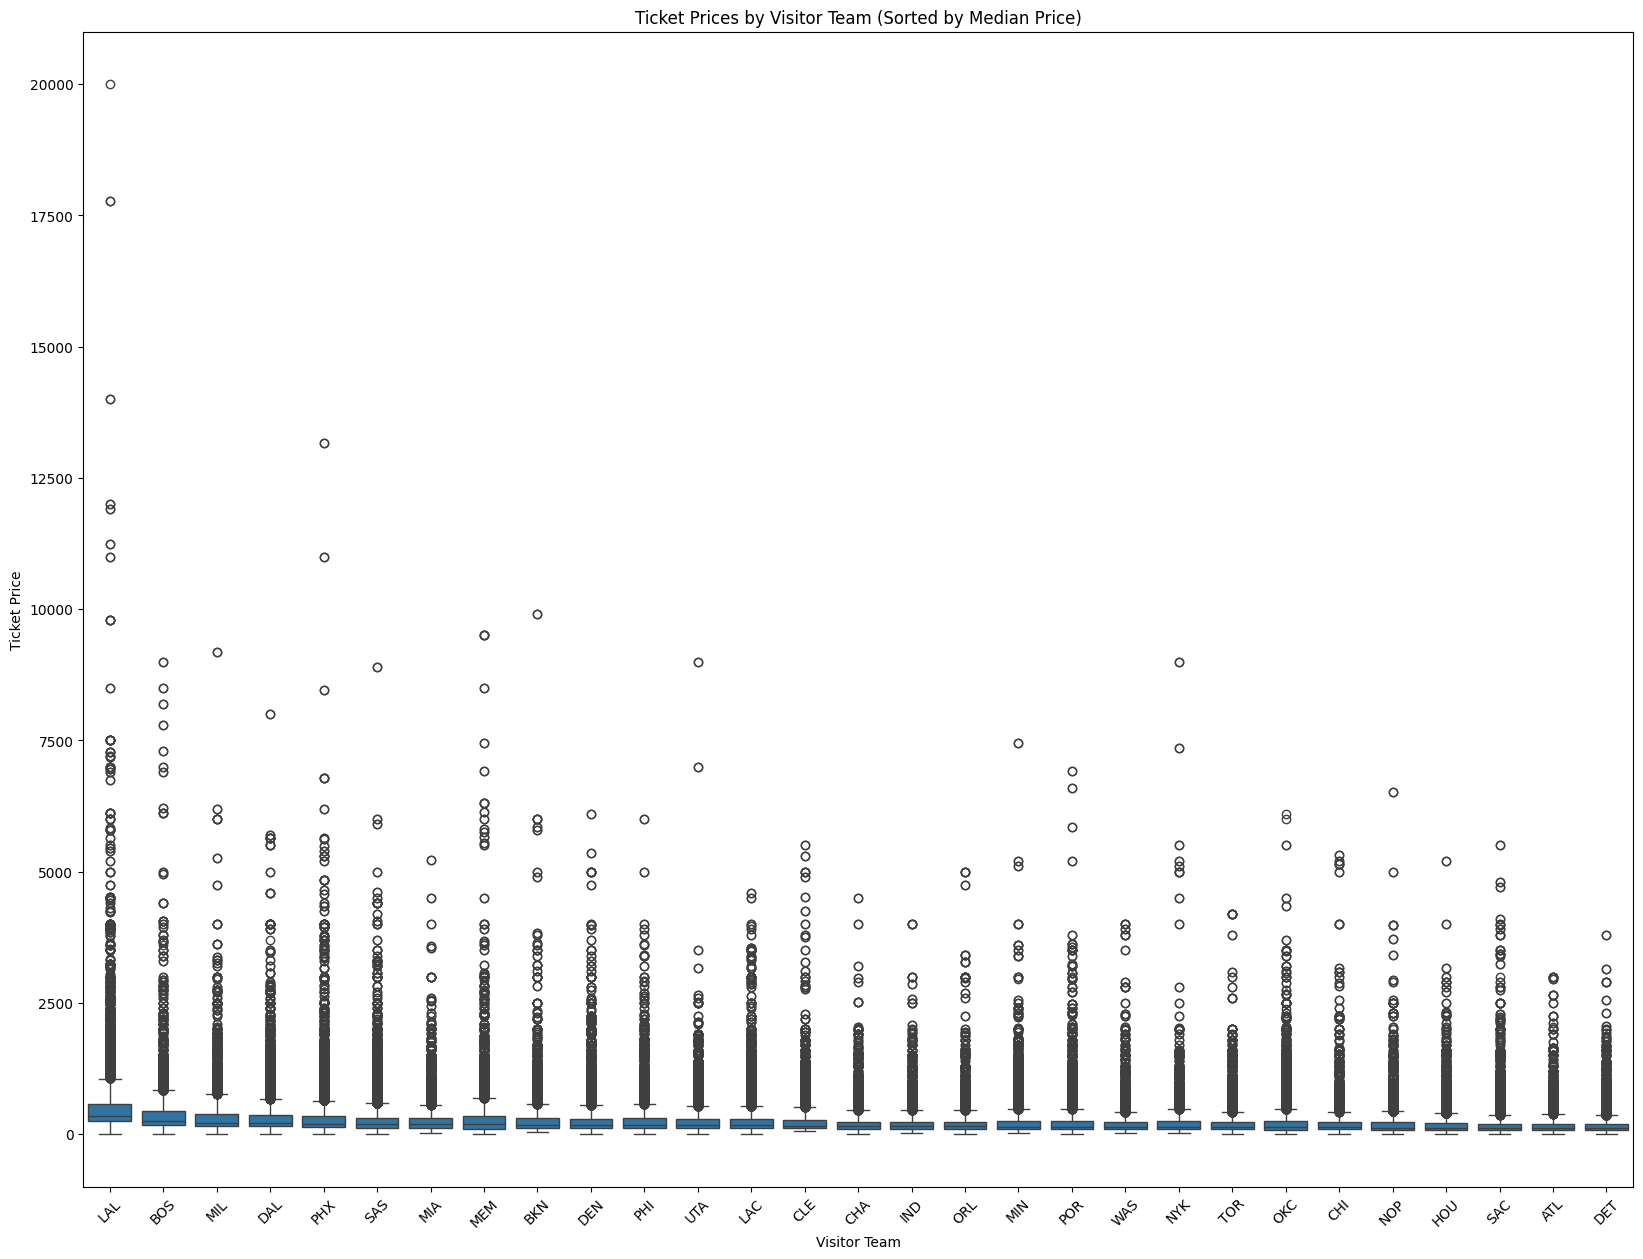

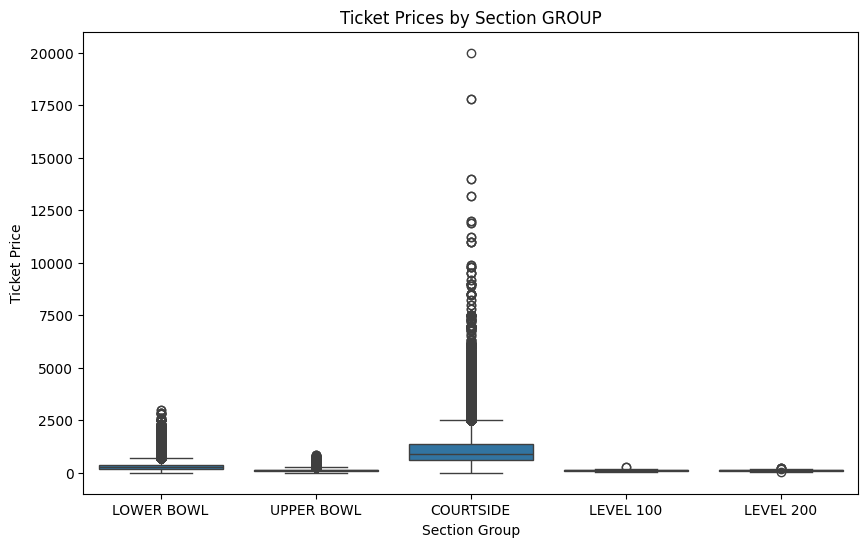

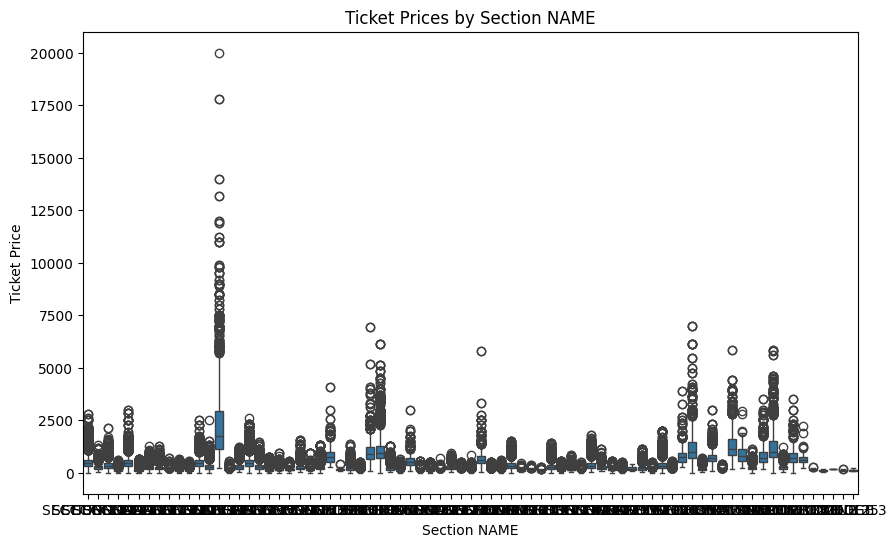

count    459159.000000
mean        257.129651
std         336.291205
min           0.000000
25%         106.000000
50%         169.000000
75%         290.000000
max       20000.000000
Name: TICKET_LISTING_PRICE, dtype: float64


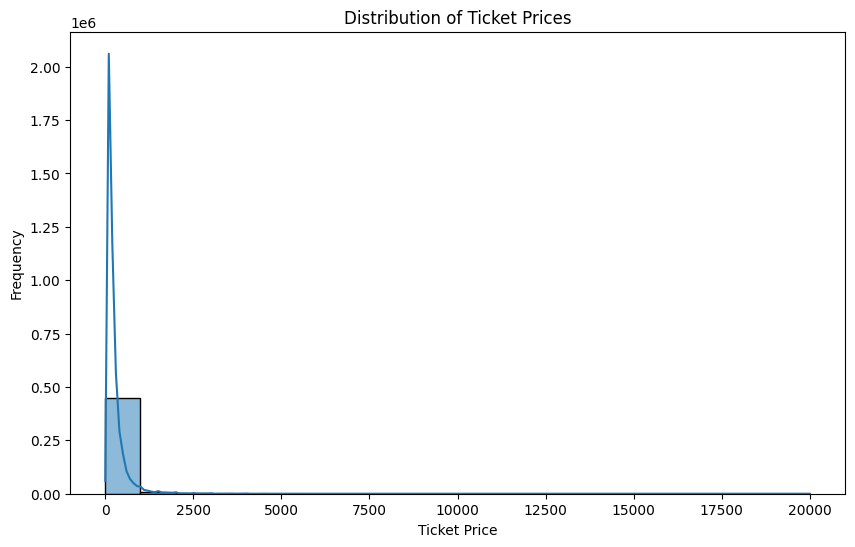

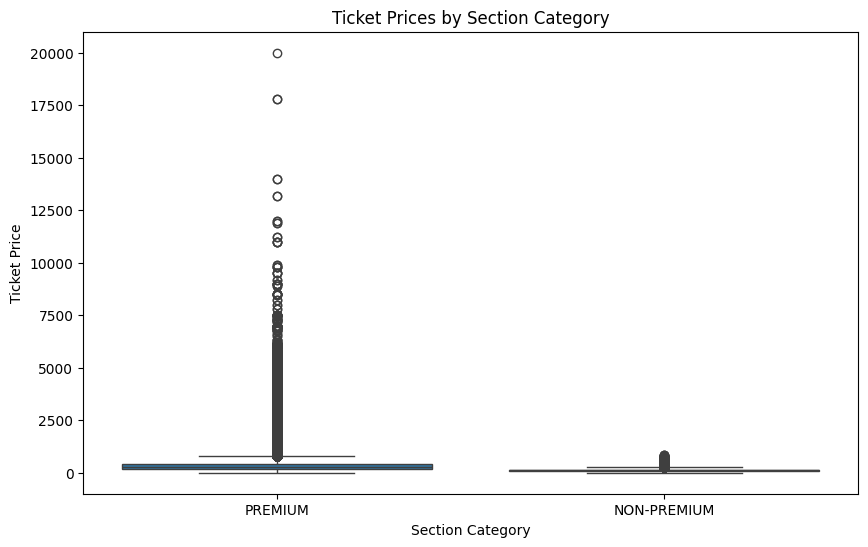

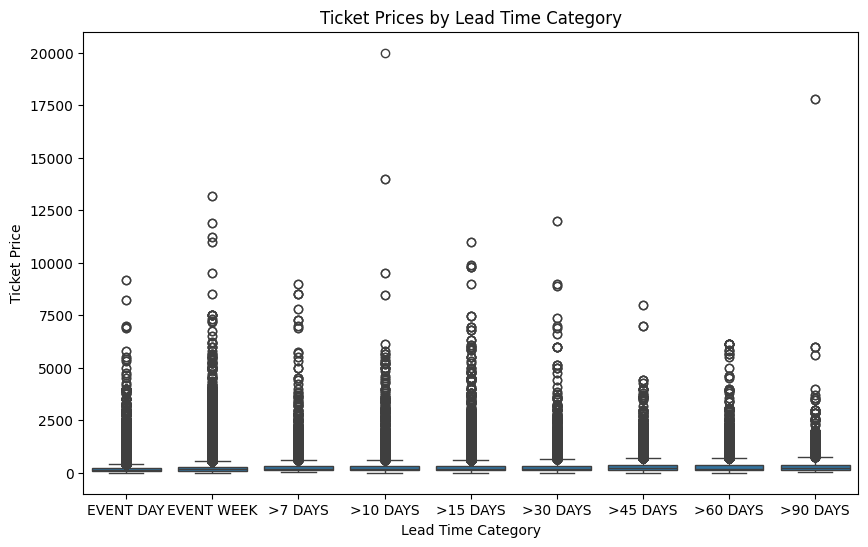

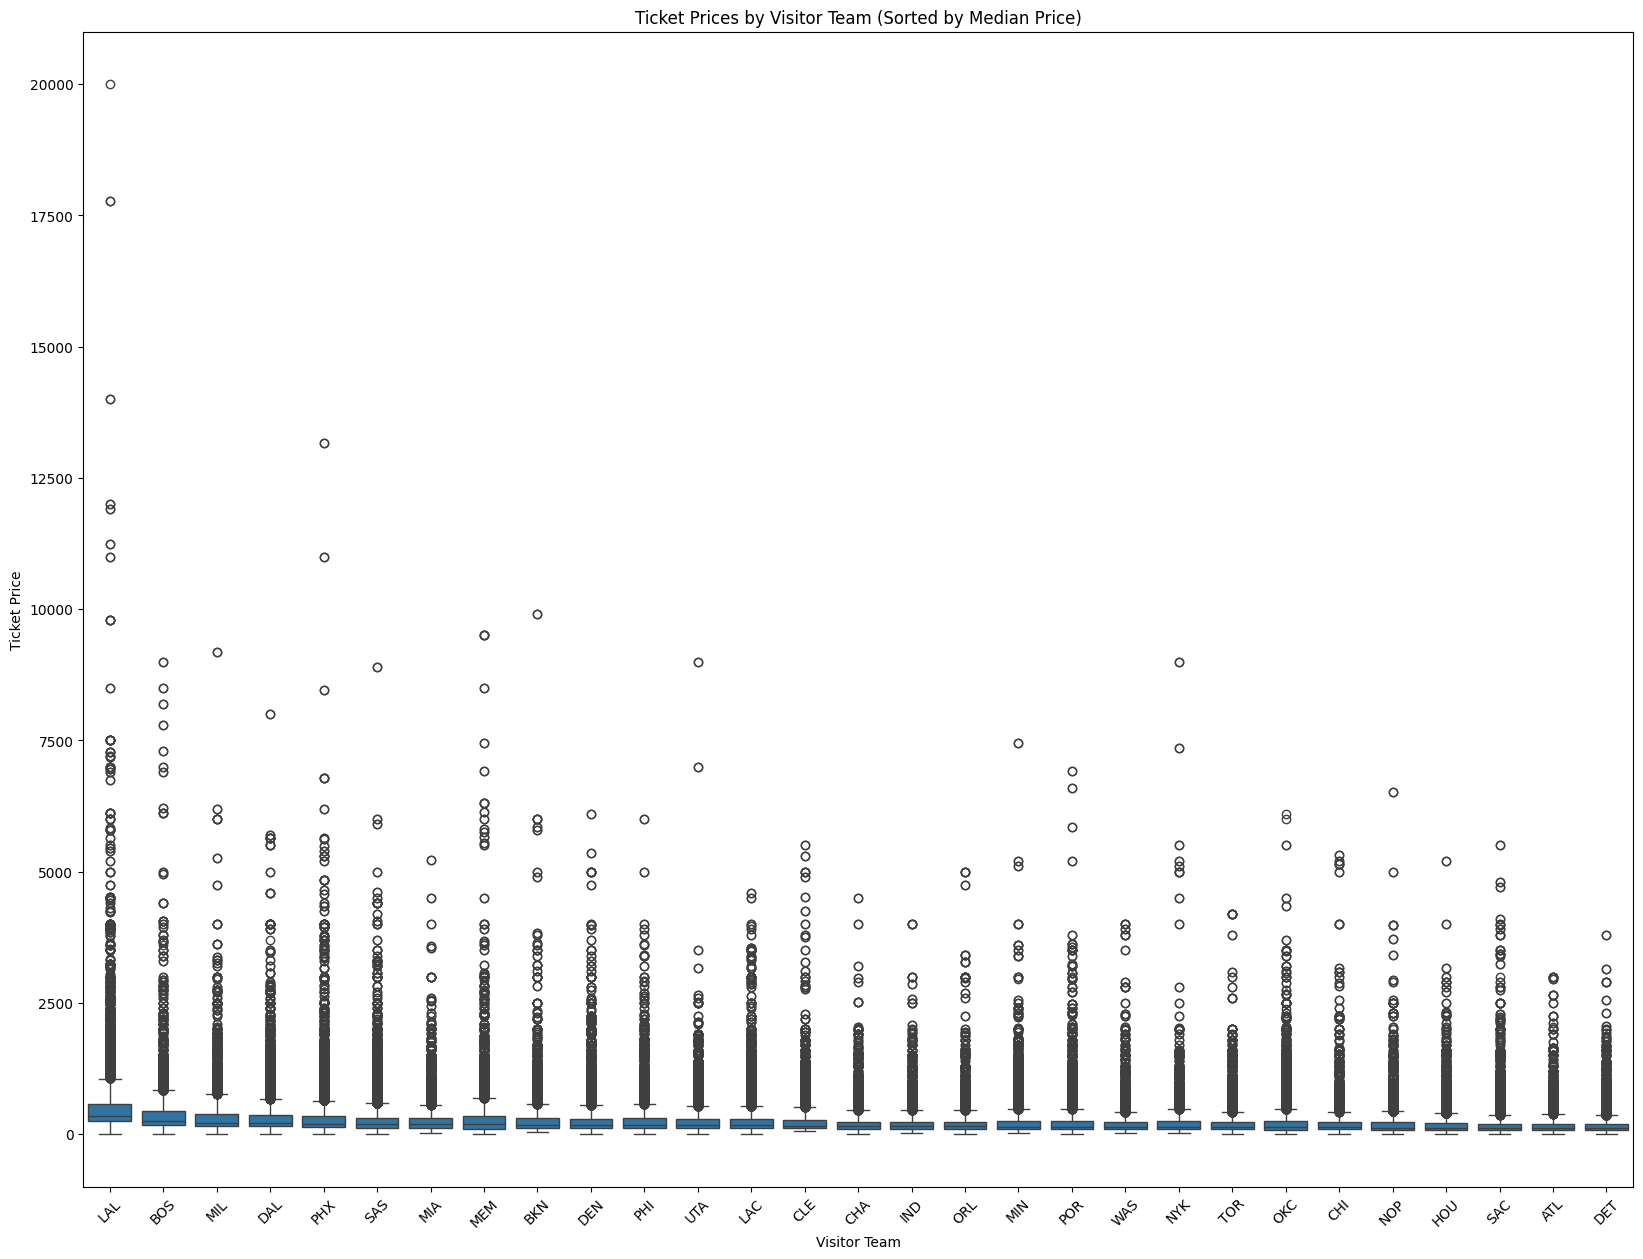

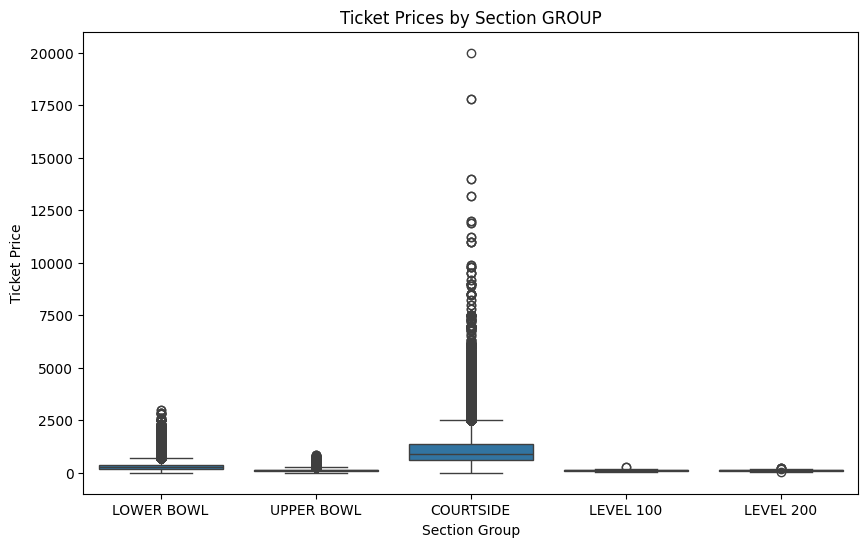

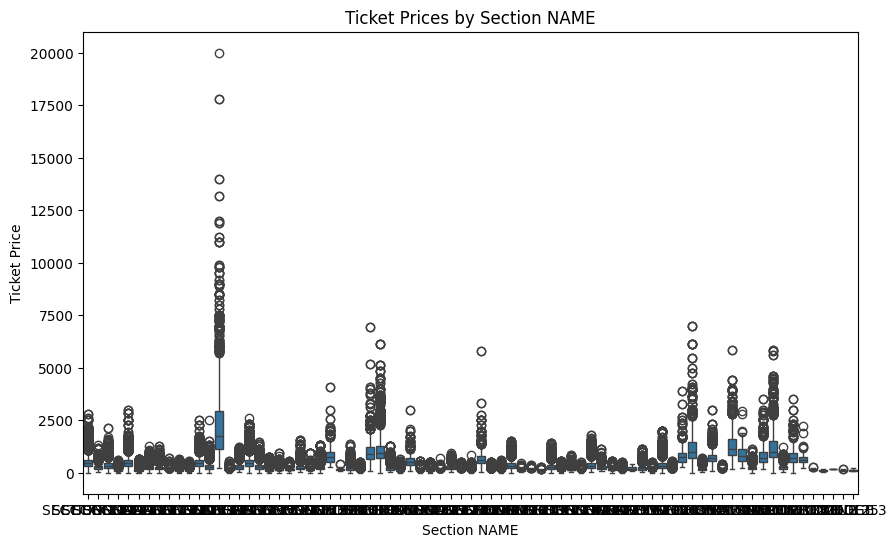

In [ ]:
# LISTING DATA EXPLORATORY ANALYSIS

# Summary statistics for ticket prices
ticket_stats = df['TICKET_LISTING_PRICE'].describe()
print(ticket_stats)

# Visualize the distribution of ticket prices
plt.figure(figsize=(10, 6))
sns.histplot(df['TICKET_LISTING_PRICE'], bins=20, kde=True)
plt.title('Distribution of Ticket Prices')
plt.xlabel('Ticket Price')
plt.ylabel('Frequency')
plt.show()

# Ticket prices by section category
plt.figure(figsize=(10, 6))
sns.boxplot(x='SECTION_CATEGORY', y='TICKET_LISTING_PRICE', data=df)
plt.title('Ticket Prices by Section Category')
plt.xlabel('Section Category')
plt.ylabel('Ticket Price')
plt.show()

# Ticket prices by lead time
plt.figure(figsize=(10, 6))
sns.boxplot(x='INVENTORY_LEAD_TIME_CATEGORY', y='TICKET_LISTING_PRICE', data=df)
plt.title('Ticket Prices by Lead Time Category')
plt.xlabel('Lead Time Category')
plt.ylabel('Ticket Price')
plt.show()


# Ticket prices by visitor
median_prices_visitor = df.groupby('VISITOR_TEAM_TRI_CODE')['TICKET_LISTING_PRICE'].median().sort_values(ascending=False)

plt.figure(figsize=(20, 15))
sns.boxplot(x='VISITOR_TEAM_TRI_CODE', y='TICKET_LISTING_PRICE', data=df, order=median_prices_visitor.index)
plt.title('Ticket Prices by Visitor Team (Sorted by Median Price)')
plt.xlabel('Visitor Team')
plt.ylabel('Ticket Price')
plt.xticks(rotation=45)
plt.show()


# Ticket prices by section
plt.figure(figsize=(10, 6))
sns.boxplot(x='SECTION_GROUP', y='TICKET_LISTING_PRICE', data=df)
plt.title('Ticket Prices by Section GROUP')
plt.xlabel('Section Group')
plt.ylabel('Ticket Price')
plt.show()

# Ticket prices by section name
plt.figure(figsize=(10, 6))
sns.boxplot(x='SECTION_NAME', y='TICKET_LISTING_PRICE', data=df)
plt.title('Ticket Prices by Section NAME')
plt.xlabel('Section NAME')
plt.ylabel('Ticket Price')
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


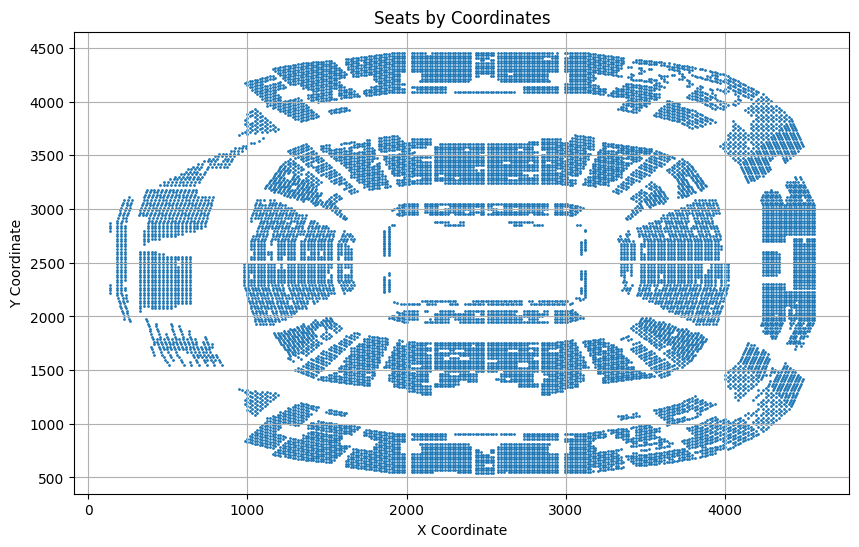

In [ ]:
# VISUALIZE SEATS BY COORDINATES

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import matplotlib.pyplot as plt

# Load seat data from CSV file
seat_data = pd.read_csv('/content/drive/MyDrive/NBA capstone/2024-03-06 Seat Coordinates.csv')


# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(seat_data['SEAT_CENTER_X'], seat_data['SEAT_CENTER_Y'], marker='o', s=1)
plt.title('Seats by Coordinates')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.grid(True)
plt.show()



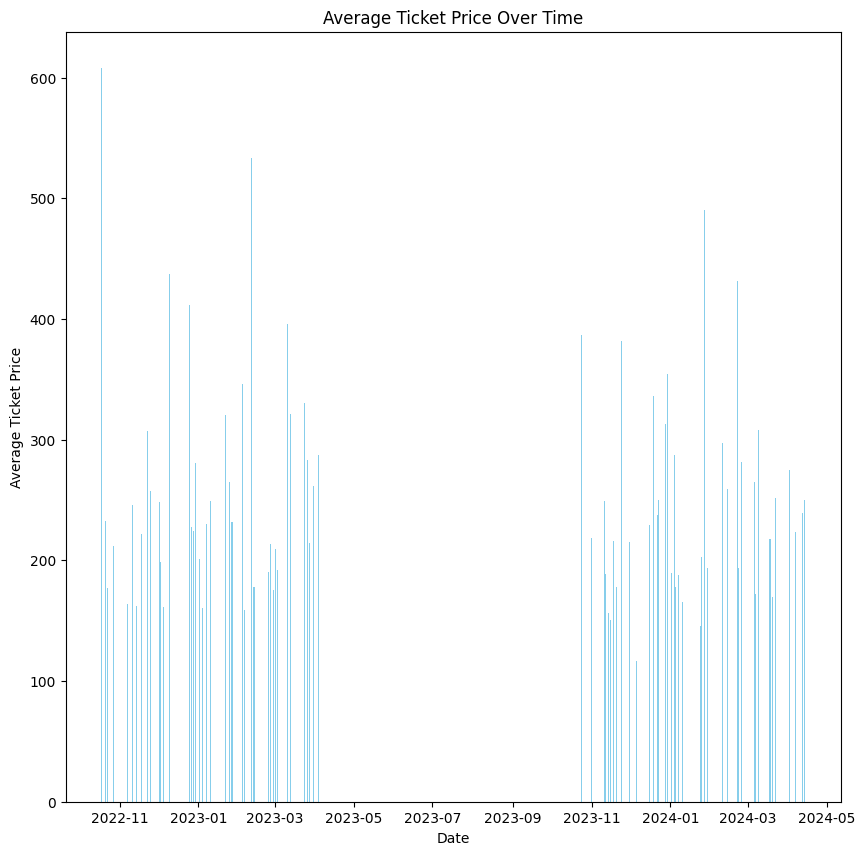

In [ ]:
# Day of Week Explorations

# Convert GAME_DATE to datetime
df['GAME_DATE'] = pd.to_datetime(df['GAME_DATE'])

# Calculate average price for each date
average_prices = df.groupby('GAME_DATE')['TICKET_LISTING_PRICE'].mean().reset_index()

# Plotting as a bar chart
plt.figure(figsize=(10, 10))
plt.bar(average_prices['GAME_DATE'], average_prices['TICKET_LISTING_PRICE'], color='skyblue')
plt.title('Average Ticket Price Over Time')
plt.xlabel('Date')
plt.ylabel('Average Ticket Price')
plt.show()



# DATA JOINING/CLEANING

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


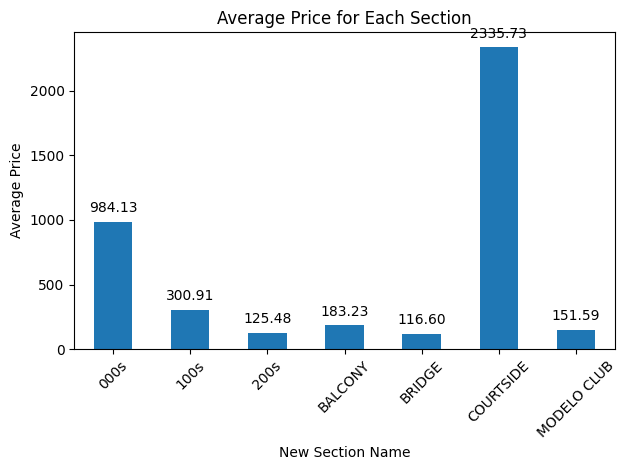

       VISITOR_TEAM_TRI_CODE SECTION_NAME ROW_NAME SEAT_NAME  \
0                        LAL    SUITE VIP       AA        90   
1                        LAL    SUITE VIP       BB         4   
2                        LAL    SUITE VIP       BB         3   
3                        LAL    SUITE VIP       AA        30   
4                        LAL    SUITE VIP       AA        31   
...                      ...          ...      ...       ...   
450961                   DAL          219       19        12   
450962                   DAL          116       15        13   
450963                   DAL          127       15         6   
450964                   DAL          217       18        23   
450965                   DAL          118       07         9   

                 SECTION_ROW_SEAT_NAME  TICKET_LISTING_PRICE  \
0         SUITE VIP - ROW AA - SEAT 90               20000.0   
1          SUITE VIP - ROW BB - SEAT 4               17777.0   
2          SUITE VIP - ROW BB - SEAT 3 

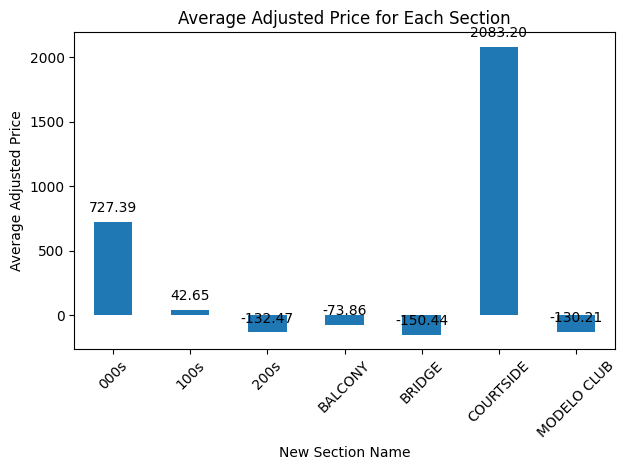

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Listing Data
df = pd.read_csv('/content/drive/MyDrive/NBA capstone/2024-03-06 Listing Data.csv')

# Seat Coordinate Data
seat_data = pd.read_csv('/content/drive/MyDrive/NBA capstone/2024-03-06 Seat Coordinates.csv')


joined_df = pd.merge(df, seat_data, on = 'SECTION_ROW_SEAT_NAME', how = 'inner')

cleaned_df = joined_df.drop(columns = ['SEASON_ID', 'SEASON_STAGE', 'HOME_TEAM_TRI_CODE_x', 'HOME_TEAM_TRI_CODE_y', 'SECTION_CATEGORY', 'SECTION_GROUP', 'SECTION_LEVEL', 'INVENTORY_LEAD_TIME_CATEGORY'])

# Remove unneccesary letters
cleaned_df['SECTION_NAME'] = cleaned_df['SECTION_NAME'].str.replace('SECTION ', '')
cleaned_df['ROW_NAME'] = cleaned_df['ROW_NAME'].str.replace('ROW ', '')
cleaned_df['SEAT_NAME'] = cleaned_df['SEAT_NAME'].str.replace('SEAT ', '')

# Remove duplicates/resales (keep the one with higher price)
cleaned_df = cleaned_df.sort_values(by='TICKET_LISTING_PRICE', ascending=False).drop_duplicates(subset=cleaned_df.columns.difference(['TICKET_LISTING_PRICE']), keep='first')

cleaned_df = cleaned_df.reset_index()
cleaned_df = cleaned_df.drop(columns = ['index', 'GAME_ID', 'GAME_DATE', 'GAME_TIME'])


# Add distance column
cleaned_df['distance_to_center'] = np.sqrt((cleaned_df['SEAT_CENTER_X'] - 2500)**2 + (cleaned_df['SEAT_CENTER_X'] - 2500)**2)



# Section Type clean up (divide into Balcony, Courtside, 100s, 200s, Modelo Club, and Bridge)
def format_value(value):
  if value[0].isdigit():
    value = int(value)
    if 0 <= value <= 99:
        return '000s'
    elif 100 <= value <= 199:
        return '100s'
    elif 200 <= value <= 299:
        return '200s'
  return



cleaned_df['new_section_type'] = cleaned_df['SECTION_NAME'].apply(lambda x: 'BRIDGE' if x.startswith('BRIDGE') else
                                                                   'MODELO CLUB' if x.startswith('MODELO CLUB') else
                                                                   'COURTSIDE' if x.startswith('SUITE VIP') else
                                                                   'BALCONY' if x.startswith('BALCONY') else format_value(x))



# Plot average price for each new_section_name
avg_prices = cleaned_df.groupby('new_section_type')['TICKET_LISTING_PRICE'].mean()
ax = avg_prices.plot(kind='bar')
plt.xlabel('New Section Name')
plt.ylabel('Average Price')
plt.title('Average Price for Each Section')

# Annotate bars with mean values
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




# Calculate average ticket price for each visitor team
avg_prices = cleaned_df.groupby('VISITOR_TEAM_TRI_CODE')['TICKET_LISTING_PRICE'].mean()

sorted_avg_prices = avg_prices.sort_values(ascending=False)

ranked_table = pd.DataFrame({
    'Visitor Team': sorted_avg_prices.index,
    'Average Price': sorted_avg_prices.values
})

# Display the sorted data in a table form
# print(ranked_table)


# Adjusted Price Calculations
avg_prices = cleaned_df.groupby('VISITOR_TEAM_TRI_CODE')['TICKET_LISTING_PRICE'].mean()
cleaned_df['adjusted_price'] = cleaned_df.apply(lambda row: row['TICKET_LISTING_PRICE'] - avg_prices[row['VISITOR_TEAM_TRI_CODE']], axis=1)

print(cleaned_df)





# Plot adjusted_price for each new_section_name
avg_prices = cleaned_df.groupby('new_section_type')['adjusted_price'].mean()
ax = avg_prices.plot(kind='bar')
plt.xlabel('New Section Name')
plt.ylabel('Average Adjusted Price')
plt.title('Average Adjusted Price for Each Section')

# Annotate bars with mean values
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Calculating the Distance/Section Score

In [ ]:
quality_score_df = cleaned_df[['SECTION_ROW_SEAT_NAME', 'adjusted_price', 'distance_to_center', 'new_section_type']]

# Distance Score
quality_score_df['distance_score'] = quality_score_df.apply(lambda row: 1/row['distance_to_center']*10000, axis=1)

# Section Score
avg_prices = cleaned_df.groupby('new_section_type')['adjusted_price'].mean()
quality_score_df['section_score'] = quality_score_df.apply(lambda row: avg_prices[row['new_section_type']]/100, axis=1)


# Seat Quality Score
quality_score_df['seat_quality_score'] = quality_score_df.apply(lambda row: 0.8*row['distance_score'] + 0.2*row['section_score'], axis=1)

print(quality_score_df)

<ipython-input-11-649fc6a37c63>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quality_score_df['distance_score'] = quality_score_df.apply(lambda row: 1/row['distance_to_center']*10000, axis=1)
<ipython-input-11-649fc6a37c63>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quality_score_df['section_score'] = quality_score_df.apply(lambda row: avg_prices[row['new_section_type']]/100, axis=1)


                 SECTION_ROW_SEAT_NAME  adjusted_price  distance_to_center  \
0         SUITE VIP - ROW AA - SEAT 90    19487.137096          432.749350   
1          SUITE VIP - ROW BB - SEAT 4    17264.137096          879.640836   
2          SUITE VIP - ROW BB - SEAT 3    17264.137096          879.640836   
3         SUITE VIP - ROW AA - SEAT 30    13487.137096          845.699710   
4         SUITE VIP - ROW AA - SEAT 31    13487.137096          845.699710   
...                                ...             ...                 ...   
450961  SECTION 219 - ROW 19 - SEAT 12     -318.079209          359.210245   
450962  SECTION 116 - ROW 15 - SEAT 13     -318.079209          138.592929   
450963   SECTION 127 - ROW 15 - SEAT 6     -318.079209         2972.676908   
450964  SECTION 217 - ROW 18 - SEAT 23     -318.079209         1762.110099   
450965   SECTION 118 - ROW 07 - SEAT 9     -318.079209         1105.915006   

       new_section_type  distance_score  section_score  seat_qu

<ipython-input-11-649fc6a37c63>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quality_score_df['seat_quality_score'] = quality_score_df.apply(lambda row: 0.8*row['distance_score'] + 0.2*row['section_score'], axis=1)


# Output quality score and price for every seat





In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor


final_df = quality_score_df[['SECTION_ROW_SEAT_NAME', 'seat_quality_score', 'adjusted_price']]

print(final_df)

grouped_df = final_df.groupby('SECTION_ROW_SEAT_NAME')[['seat_quality_score', 'adjusted_price']].mean().reset_index()


print(grouped_df)




                 SECTION_ROW_SEAT_NAME  seat_quality_score  adjusted_price
0         SUITE VIP - ROW AA - SEAT 90           22.652855    19487.137096
1          SUITE VIP - ROW BB - SEAT 4           13.261024    17264.137096
2          SUITE VIP - ROW BB - SEAT 3           13.261024    17264.137096
3         SUITE VIP - ROW AA - SEAT 30           13.626026    13487.137096
4         SUITE VIP - ROW AA - SEAT 31           13.626026    13487.137096
...                                ...                 ...             ...
450961  SECTION 219 - ROW 19 - SEAT 12           22.006137     -318.079209
450962  SECTION 116 - ROW 15 - SEAT 13           57.808299     -318.079209
450963   SECTION 127 - ROW 15 - SEAT 6            2.776474     -318.079209
450964  SECTION 217 - ROW 18 - SEAT 23            4.275068     -318.079209
450965   SECTION 118 - ROW 07 - SEAT 9            7.319126     -318.079209

[450966 rows x 3 columns]
              SECTION_ROW_SEAT_NAME  seat_quality_score  adjusted_price
0